# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Helper function to evaluate the model
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

# Linear Regression in Statsmodels

In [3]:
# Load the data
df = pd.read_csv('data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Check for null values
df.isna().sum().sum()

0

In [5]:
# Check for duplicates
df.duplicated().sum()

0

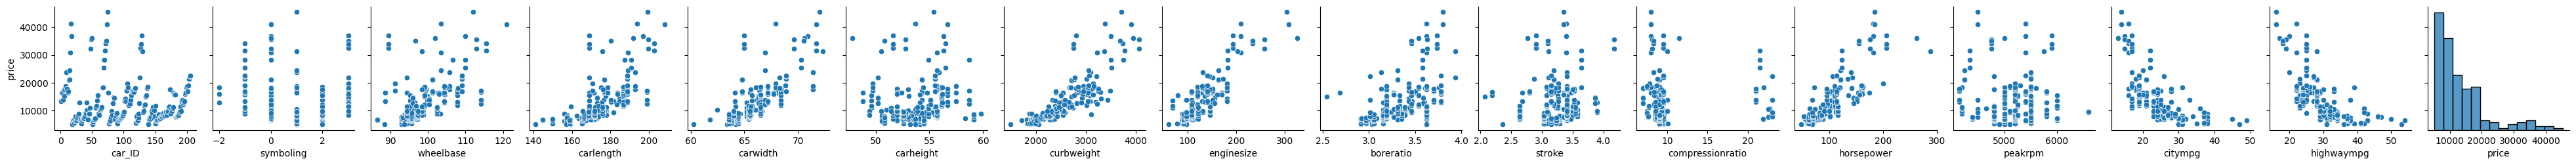

In [6]:
# Quick EDA for features related to target.
sns.pairplot(df, y_vars = 'price');

In [7]:
# Call the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# Set the target and features
X = df.drop(columns = ['price', 'car_ID']).copy()
y = df['price'].copy()

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
# Get the numeric and categorical columns
cat_select = make_column_selector(dtype_include = 'object')
num_select = make_column_selector(dtype_include = 'number')
cat_cols = cat_select(X_train)
num_cols = num_select(X_train)

In [11]:
# Make a preprocessing pipeline
cat_pipe = make_pipeline(OneHotEncoder(handle_unknown = 'ignore',
                         sparse = False))
num_pipe = make_pipeline(SimpleImputer(strategy = 'mean'))
preprocessor = make_column_transformer((cat_pipe, cat_cols), 
                                       (num_pipe, num_cols),
                                       remainder = 'passthrough')

In [12]:
# Fit the column transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'carheight', 'curbweight',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower', 'peakrpm',
                                  'citympg', 'highwaympg'])])

In [13]:
# Explore the transformation as a data frame
pd.DataFrame(preprocessor.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.7,3139.0,181.0,3.43,3.27,9.0,160.0,5200.0,19.0,25.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,1938.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3016.0,171.0,3.27,3.35,9.3,161.0,5200.0,19.0,24.0


In [14]:
# Make an empty list for the feature names
final_features = []

In [15]:
# Investigate the categorical pipeline
preprocessor.named_transformers_['pipeline-1'].named_steps

{'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [16]:
# Get the one hot encoder steps
ohe_step = preprocessor.named_transformers_['pipeline-1'].\
named_steps['onehotencoder']
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
# Get the feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero Quadrifoglio',
       'CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_audi fox', 'CarName_bmw 320i',
       'CarName_bmw x1', 'CarName_bmw x3', 'CarName_bmw z4',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge coronet custom', 'CarName_dodge d200',
       'CarName_dodge dart custom', 'CarName_dodge rampage',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1500 gl',
       'CarName_honda civic cvcc', 'CarName_honda prelude',
       'CarName_isuzu D-Max ', 'CarName_isuzu MU-X'

In [18]:
# Add the categorical feature names to the final_features list
final_features.extend(cat_features)

In [19]:
# Add the numeric feature names to the final_features list
final_features.extend(num_cols)
final_features

['CarName_Nissan versa',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw z4',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge d200',
 'CarName_dodge dart custom',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda accord lx',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuzu D-Max ',
 'CarName_isuzu MU-X',
 'CarName_jaguar xf',
 'CarName_jaguar xj',
 'CarName_jaguar xk',
 'CarName_

In [20]:
# Transform X_train and X_test into data frames
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns = final_features,
                          index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns = final_features,
                         index = X_test.index)
display(X_train_df.head(), X_test_df.head())

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


In [21]:
# Add a constant column to X_train_df and X_test_df
X_train_df = sm.add_constant(X_train_df, has_constant = 'add', prepend = False)
X_test_df = sm.add_constant(X_test_df, has_constant = 'add', prepend = False)

display(X_train_df.head(), X_test_df.head())

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,1.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0,1.0


,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,1.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0,1.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0,1.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0,1.0


In [22]:
# Construct a linear regression model
model = sm.OLS(y_train, X_train_df, hasconst = True)
result = model.fit()

In [23]:
# Evaluate the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sun, 16 Oct 2022   Prob (F-statistic):            0.00126
Time:                        20:17:16   Log-Likelihood:                -1139.8
No. Observations:                 153   AIC:                             2574.
Df Residuals:                       6   BIC:                             3019.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_Nissan versa                     2780.2761   6247.193      0.445      0.672   -1.25e+04    1.81e+04
CarName_alfa-romero Quadrifoglio         4171.6131   7214.829      0.578      0.584   -1.35e+04    2.18e+04
CarName_alfa-romero giulia              -3648.5225   5867.049     -0.622      0.557    -1.8e+04    1.07e+04
CarName_alfa-romero stelvio              -643.5225   5867.049     -0.110      0.916    -1.5e+04    1.37e+04
CarName_audi 100 ls                      1471.6822   3945.640      0.373      0.722   -8182.951    1.11e+04
CarName_audi 100ls                      -3582.7541   3870.321     -0.926      0.390   -1.31e+04    5887.579
CarName_audi 4000                       -1638.0785   7095.196     -0.231      0.825    -1.9e+04    1.57e+04
CarName_audi 5000                       -2515.4776   4483.782     -0.561      0.595   -1.35e+04    8455.941
CarName_audi fox                         4121.4112   1.28e+04      0.323      0.758   -2.71e+04    3.53e+04
CarName_bmw 320i                         7346.1212   5778.146      1.271      0.251   -6792.492    2.15e+04
CarName_bmw x1                           1.918e+04   1.02e+04      1.876      0.110   -5838.900    4.42e+04
CarName_bmw x3                           1.678e+04   7202.949      2.330      0.059    -843.548    3.44e+04
CarName_bmw z4                           1.343e+04   8622.622      1.558      0.170   -7664.254    3.45e+04
CarName_buick opel isuzu deluxe         -3469.5950   7752.164     -0.448      0.670   -2.24e+04    1.55e+04
CarName_buick regal sport coupe (turbo)  8790.8218   1.09e+04      0.809      0.450   -1.78e+04    3.54e+04
CarName_buick skyhawk                    1043.3913   1.38e+04      0.076      0.942   -3.27e+04    3.48e+04
CarName_buick skylark                   -6176.6426   7246.869     -0.852      0.427   -2.39e+04    1.16e+04
CarName_chevrolet vega 2300             -1073.6451   5327.712     -0.202      0.847   -1.41e+04     1.2e+04
CarName_dodge challenger se              1003.2570   6270.995      0.160      0.878   -1.43e+04    1.63e+04
CarName_dodge colt (sw)                 -3900.1592   6791.047     -0.574      0.587   -2.05e+04    1.27e+04
CarName_dodge coronet custom            -3554.1192   8782.584     -0.405      0.700    -2.5e+04    1.79e+04
CarName_dodge d200                      -1178.2201   9141.552     -0.129      0.902   -2.35e+04    2.12e+04
CarName_dodge dart custom                -553.4716   4904.682     -0.113      0.914   -1.26e+04    1.14e+04
CarName_dodge rampage                     -78.5718   7059.838     -0.011      0.991   -1.74e+04    1.72e+04
CarName_honda accord                     2945.9623   1.42e+04      0.208      0.842   -3.17e+04    3.76e+04
CarName_honda accord cvcc                 316.4436   1.07e+

In [24]:
# Evaluate the model on the test set
test_preds = result.predict(X_test_df)
print('Test r2:', r2_score(y_test, test_preds))
print('Test MSE:', mean_squared_error(y_test, test_preds))

Test r2: 0.4838988542960253
Test MSE: 34919164.50231602


# Diagnosing the Model

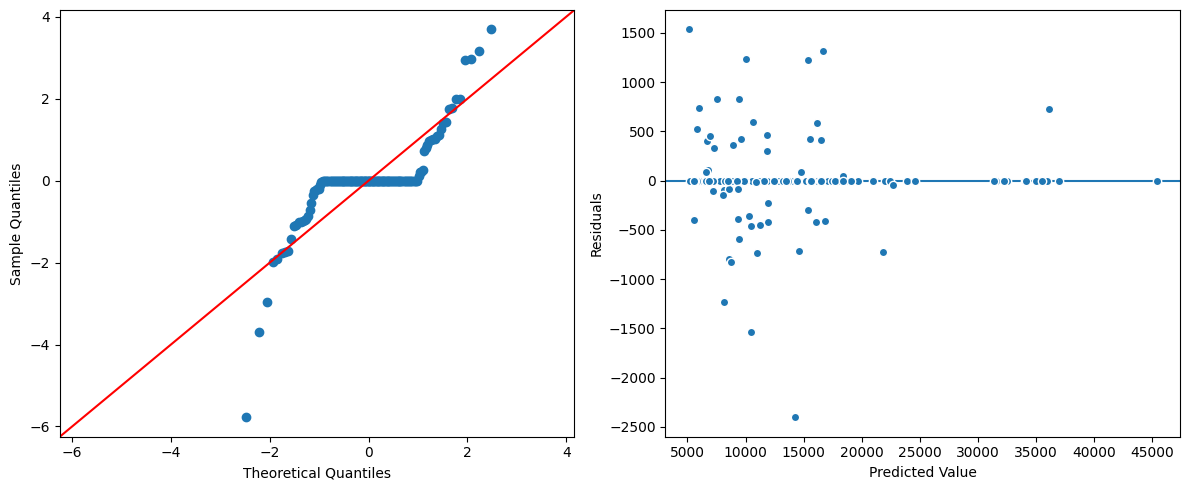

In [25]:
# Evaluate the model
evaluate_ols(result, X_train_df, y_train)

In [26]:
# Get the z-scores of the target
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1, 1))
z_price = pd.Series(z_price.flatten(), index = y_train.index)

In [27]:
# Find any outliers
idx_outliers = z_price > 3
idx_outliers.sum()

2

In [28]:
# Remove the outliers
X_train_cln = X_train_df[~idx_outliers]
y_train_cln = y_train[~idx_outliers]

In [29]:
# Determine the range our model is valid for
print('Min:', y_train_cln.min())
print('Max:', y_train_cln.max())

Min: 5118.0
Max: 36880.0


In [30]:
# Remove outliers from the test data
z_price_test = scaler.transform(y_test.values.reshape(-1, 1))
z_price_test = pd.Series(z_price_test.flatten(), index = y_test.index)
idx_outliers_test = z_price_test > 3
print(idx_outliers_test.sum())
X_test_cln = X_test_df[~idx_outliers_test]
y_test_cln = y_test[~idx_outliers_test]

2


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     12.38
Date:                Sun, 16 Oct 2022   Prob (F-statistic):            0.00205
Time:                        20:17:18   Log-Likelihood:                -1125.9
No. Observations:                 151   AIC:                             2542.
Df Residuals:                       6   BIC:                             2979.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

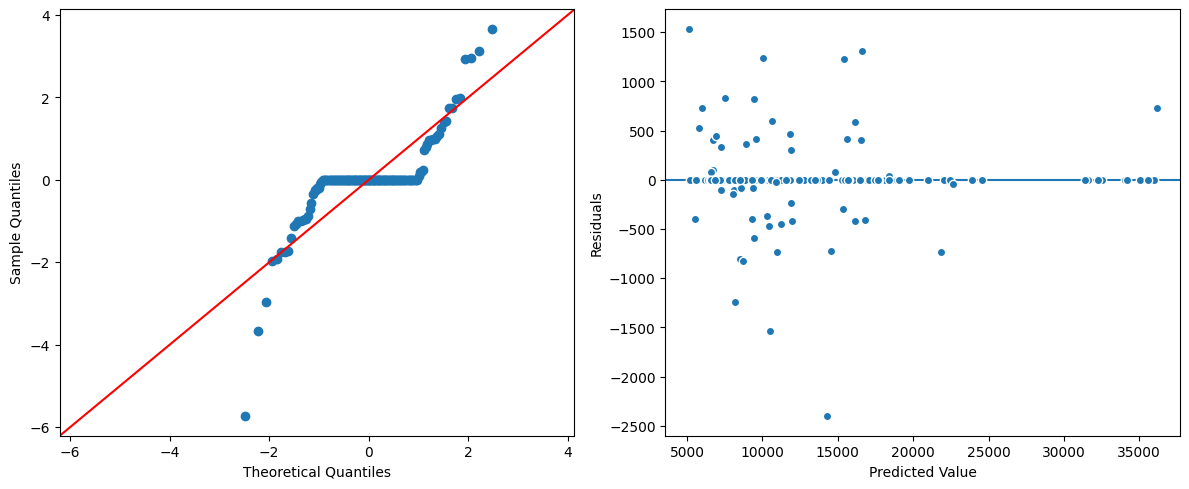

In [31]:
# Construct a model with the outliers removed
model = sm.OLS(y_train_cln, X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result, X_train_cln, y_train_cln)

In [32]:
# Investigate the p-values
p_vals = result.pvalues
p_vals[p_vals > 0.05]

CarName_Nissan versa                0.675853
CarName_alfa-romero Quadrifoglio    0.547240
CarName_alfa-romero giulia          0.602831
CarName_alfa-romero stelvio         0.972119
CarName_audi 100 ls                 0.734200
                                      ...   
horsepower                          0.670948
peakrpm                             0.891365
citympg                             0.997335
highwaympg                          0.882875
const                               0.722712
Length: 170, dtype: float64

In [33]:
# Determine the number of insignificant p-values
(p_vals > 0.05).sum()

170

In [34]:
# Determine how many carName columns have insignificant p-values
print(p_vals[p_vals > 0.05].index.str.startswith('CarName').sum())
print(p_vals.index.str.startswith('CarName').sum())

119
119


In [35]:
# Determine the features with insignificant p-values not starting with CarName
filter = p_vals[p_vals > 0.05].index.str.startswith('CarName')
p_vals[~filter]

fueltype_diesel          0.963831
fueltype_gas             0.516807
aspiration_std           0.717295
aspiration_turbo         0.733925
doornumber_four          0.784787
doornumber_two           0.670519
carbody_convertible      0.668628
carbody_hardtop          0.889361
carbody_hatchback        0.620445
carbody_sedan            0.861230
carbody_wagon            0.633031
drivewheel_4wd           0.781273
drivewheel_fwd           0.795144
drivewheel_rwd           0.672270
enginelocation_front     0.459631
enginelocation_rear      0.398431
enginetype_dohc          0.657725
enginetype_dohcv         0.840510
enginetype_l             0.533473
enginetype_ohc           0.528576
enginetype_ohcf          0.848026
enginetype_ohcv          0.857209
enginetype_rotor         0.978087
cylindernumber_eight     0.839251
cylindernumber_five      0.811649
cylindernumber_four      0.910022
cylindernumber_six       0.259464
cylindernumber_twelve    0.872193
cylindernumber_two       0.978087
fuelsystem_1bb

In [36]:
# Call df.info to determine which features to drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# All the above can be removed from the data
X_train_cln.drop(columns = p_vals[p_vals > 0.05].index)

""
90
173
93
5
167
...
106
14
92
179
